In [1]:
import os

import matplotlib.pyplot as plt
import numpy as np

from stabda.utils import xr_load, get_results_path, get_distr_on_times

In [2]:
results_path = get_results_path()
filename = 'decode_sample_10_50.nc'

filepath = os.path.join(results_path, filename)

results = xr_load(filepath)

In [3]:
distr_start_dict = get_distr_on_times()
sessions = results.session.data
delays = results.delay.data
x = results.timepts

n_sessions = sessions.size

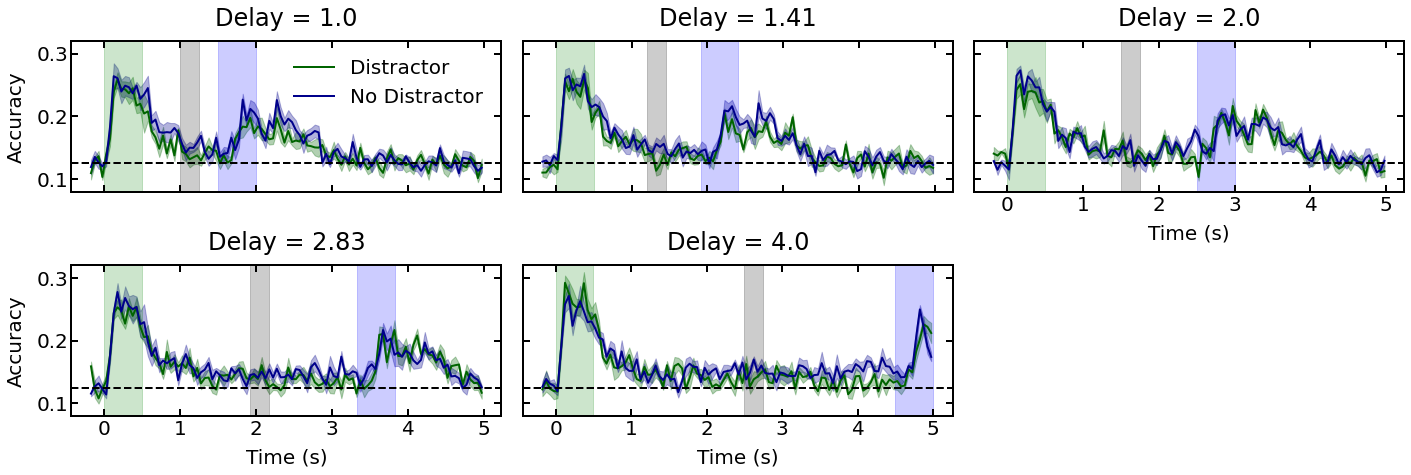

In [5]:
plt.style.use('sci_style.py')

fig, ax = plt.subplots(2, 3, figsize=(20,7),  sharey=True)

samp_color = 'g'
test_color = 'b'
dis_color = 'k'

nd_color = 'darkblue'
d_color = 'darkgreen'

alpha_box = 0.2

ax = ax.ravel()

for i, delay in enumerate(delays):
    test_start = ((delay*1000)+500) * 1e-3
    distr_start = (distr_start_dict[delay])
    
    mean_d = results.loc[:,delay,1,:].mean('session')
    mean_nd = results.loc[:,delay,0,:].mean('session')
    
    err_d = results.loc[:,delay,1,:].std('session') / np.sqrt(n_sessions)
    err_nd = results.loc[:,delay,0,:].std('session') / np.sqrt(n_sessions)
    
    ax[i].plot(x, mean_d, color = d_color, label='Distractor')
    ax[i].fill_between(x, mean_d - err_d, mean_d + err_d, color = d_color, alpha=0.3)
    ax[i].plot(x, mean_nd, color = nd_color, label='No Distractor')
    ax[i].fill_between(x, mean_nd - err_nd, mean_nd + err_nd, color = nd_color, alpha=0.3)
    
    ax[i].axhline(1/8, color='k', linestyle='--')
    ax[i].axvspan(0,0.500, color=samp_color, alpha=alpha_box)
    ax[i].axvspan(test_start, test_start+0.500, color=test_color, alpha=alpha_box)
    ax[i].axvspan(distr_start, distr_start+0.250, color=dis_color, alpha=alpha_box)
    ax[i].set_title(f'Delay = {delay}')
    
    if i == 0:
        ax[i].legend()
        
    if i >= 2:
        ax[i].set_xlabel('Time (s)')
        
    if i == 0 or i == 3:
        ax[i].set_ylabel('Accuracy')
        
    if i < 2:
        ax[i].set_xticklabels([])
    
ax[5].set_visible(False)
plt.tight_layout()
plt.savefig('figures/decode_sample.png', dpi=300)